## Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

-postgres_user = 'dsbc_student'
-postgres_pw = '7*.8G9QH21'
-postgres_host = '142.93.121.174'
-postgres_port = '5432'
-postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:


In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
# taking care of missing values by interpolation
df_education = df.copy()

#make a list of the columns that has missing values and we want to keep them
list_to_keep = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',                   
                'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',    
                'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',                      
                'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 
                'GRADES_9_12_G', 'GRADES_ALL_G']


states = df_education['STATE'].unique()

for state in states:
    df_education.loc[df_education['STATE'] == state, list_to_keep] = df_education.loc[df_education['STATE'] == state, 
                                                                    list_to_keep].interpolate()


In [6]:
#drop nulls after interpolating

df_education.dropna(inplace = True)

In [7]:
#checking for null values
df_education.isnull().sum() * 100 / df_education.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [8]:
df_education.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


### Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

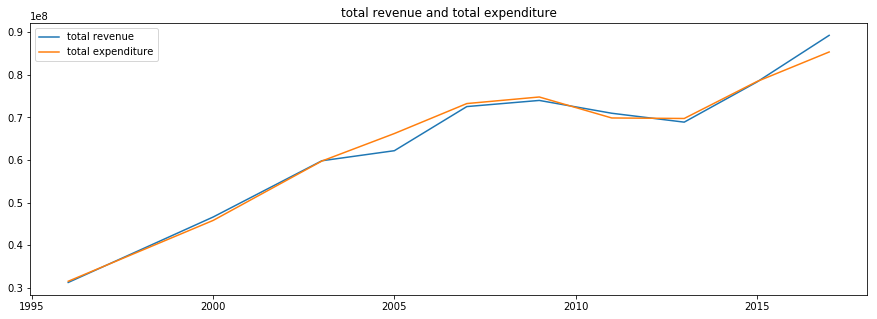

In [9]:
plt.figure(figsize = (15,5))

plt.plot(df_education.loc[df_education.STATE == "CALIFORNIA", "YEAR"], 
         df_education.loc[df_education.STATE == "CALIFORNIA", "TOTAL_REVENUE"], 
         label="total revenue")

plt.plot(df_education.loc[df_education.STATE == "CALIFORNIA", "YEAR"], 
         df_education.loc[df_education.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], 
         label="total expenditure")
plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

### In your chosen state, which of the lessons are the students more successful, math or reading?

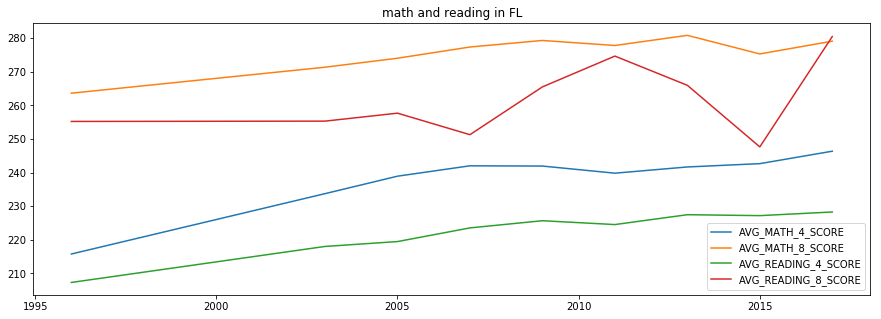

In [12]:
plt.figure(figsize = (15,5))

plt.plot(df_education.loc[df_education.STATE == "FLORIDA", "YEAR"], 
         df_education.loc[df_education.STATE == "FLORIDA", "AVG_MATH_4_SCORE"], 
         label="AVG_MATH_4_SCORE")

plt.plot(df_education.loc[df_education.STATE == "FLORIDA", "YEAR"], 
         df_education.loc[df_education.STATE == "FLORIDA", "AVG_MATH_8_SCORE"], 
         label="AVG_MATH_8_SCORE")

plt.plot(df_education.loc[df_education.STATE == "FLORIDA", "YEAR"], 
         df_education.loc[df_education.STATE == "FLORIDA", "AVG_READING_4_SCORE"], 
         label="AVG_READING_4_SCORE")

plt.plot(df_education.loc[df_education.STATE == "FLORIDA", "YEAR"], 
         df_education.loc[df_education.STATE == "FLORIDA", "AVG_READING_8_SCORE"], 
         label="AVG_READING_8_SCORE")

plt.title("math and reading in FL")
plt.legend()
plt.show()

Looks like reading (red and green) is always lower than Math (orange and blue) in FL

### What are the distributions of the math and reading scores in the sample?
* We did not take care of missing values for the math and reading scores so it doesn't matter what you use, df or df_education, the distribution should be the same


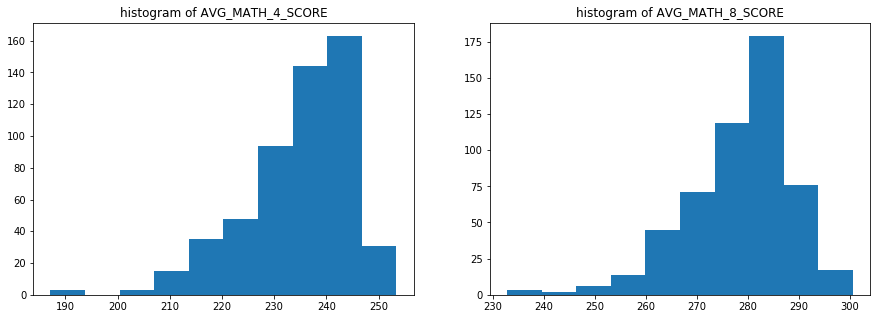

In [24]:
plt.figure(figsize = (15,5))
# histograms of the original data
plt.subplot(1, 2, 1)
plt.hist(df["AVG_MATH_4_SCORE"])
plt.title("histogram of AVG_MATH_4_SCORE")

plt.subplot(1, 2, 2)
plt.hist(df["AVG_MATH_8_SCORE"])
plt.title("histogram of AVG_MATH_8_SCORE")

plt.show()

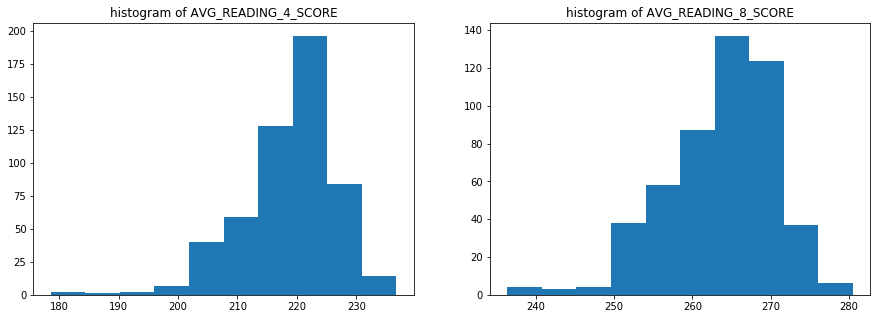

In [25]:
plt.figure(figsize = (15,5))
# histograms of the original data
plt.subplot(1, 2, 1)
plt.hist(df["AVG_READING_4_SCORE"])
plt.title("histogram of AVG_READING_4_SCORE")

plt.subplot(1, 2, 2)
plt.hist(df["AVG_READING_8_SCORE"])
plt.title("histogram of AVG_READING_8_SCORE")

plt.show()

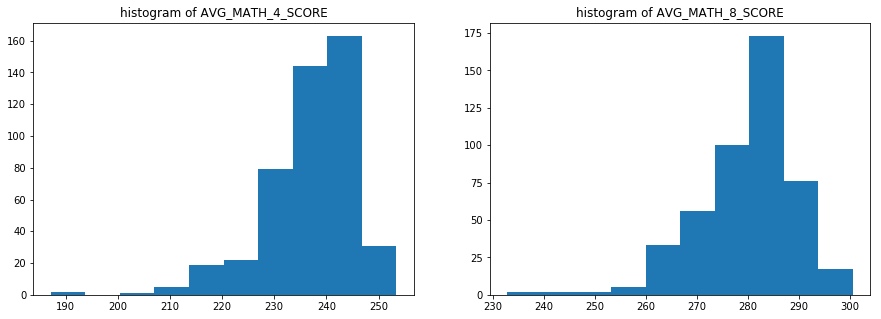

In [15]:
plt.figure(figsize = (15,5))
# histograms of the original data
plt.subplot(1, 2, 1)
plt.hist(df_education["AVG_MATH_4_SCORE"])
plt.title("histogram of AVG_MATH_4_SCORE")

plt.subplot(1, 2, 2)
plt.hist(df_education["AVG_MATH_8_SCORE"])
plt.title("histogram of AVG_MATH_8_SCORE")

plt.show()

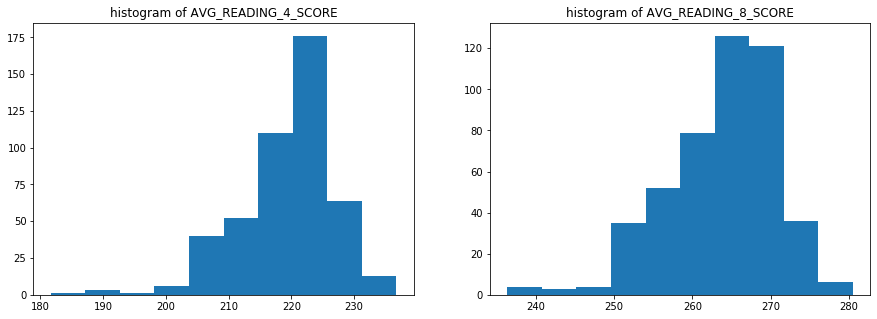

In [23]:
plt.figure(figsize = (15,5))
# histograms of the original data
plt.subplot(1, 2, 1)
plt.hist(df_education["AVG_READING_4_SCORE"])
plt.title("histogram of AVG_READING_4_SCORE")

plt.subplot(1, 2, 2)
plt.hist(df_education["AVG_READING_8_SCORE"])
plt.title("histogram of AVG_READING_8_SCORE")

plt.show()

### Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. 

In [32]:
# taking care of missing values by interpolation
df_education2 = df.copy()

#make a list of the columns that has missing values and we want to keep them
score_list = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for col in score_list:
    df_education2.loc[:,col] = df_education2.loc[:,col].fillna(df_education2.loc[:,col].mean())


In [40]:
# taking care of missing values by interpolation
df_education3 = df.copy()

#make a list of the columns that has missing values and we want to keep them
score_list = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for col in score_list:
    df_education3.loc[:,col] = df_education3.loc[:,col].fillna(df_education3.loc[:,col].median())


In [41]:
# taking care of missing values by interpolation
df_education4 = df.copy()

#make a list of the columns that has missing values and we want to keep them
score_list = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for col in score_list:
    df_education4.loc[:,col] = df_education4.loc[:,col].fillna(df_education4.loc[:,col].interpolate())


In [42]:
df.isnull().sum() * 100 / df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [43]:
df_education.isnull().sum() * 100 / df_education.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [44]:
df_education2.isnull().sum() * 100 / df_education2.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0

In [45]:
df_education3.isnull().sum() * 100 / df_education3.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0

In [46]:
df_education4.isnull().sum() * 100 / df_education4.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0

### Then compare the effects of these techniques on the distributions of the score variables.

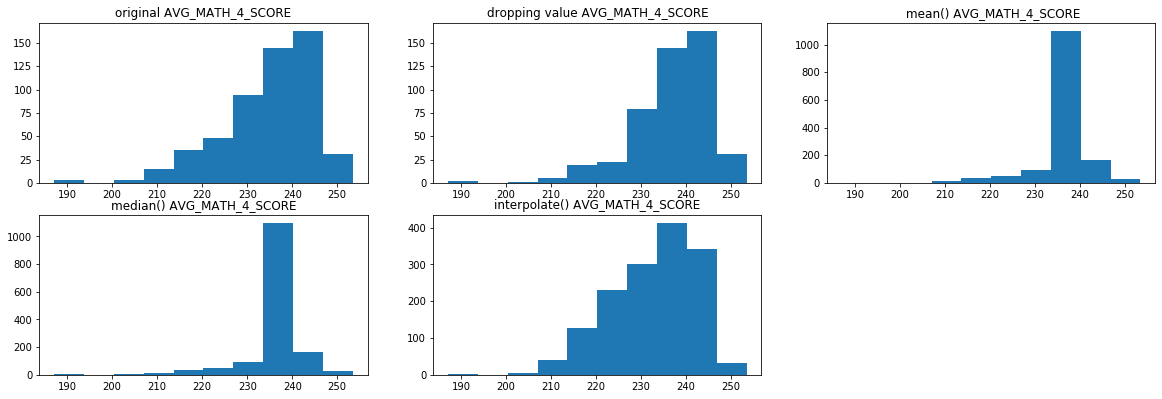

In [56]:
plt.figure(figsize = (20,10))

plt.subplot(3, 3, 1)
plt.hist(df["AVG_MATH_4_SCORE"])
plt.title("original AVG_MATH_4_SCORE")

plt.subplot(3, 3, 2)
plt.hist(df_education["AVG_MATH_4_SCORE"])
plt.title("dropping value AVG_MATH_4_SCORE")

plt.subplot(3, 3, 3)
plt.hist(df_education2["AVG_MATH_4_SCORE"])
plt.title(" mean() AVG_MATH_4_SCORE")

plt.subplot(3, 3, 4)
plt.hist(df_education3["AVG_MATH_4_SCORE"])
plt.title("median() AVG_MATH_4_SCORE")

plt.subplot(3, 3, 5)
plt.hist(df_education4["AVG_MATH_4_SCORE"])
plt.title("interpolate() AVG_MATH_4_SCORE")

plt.show()

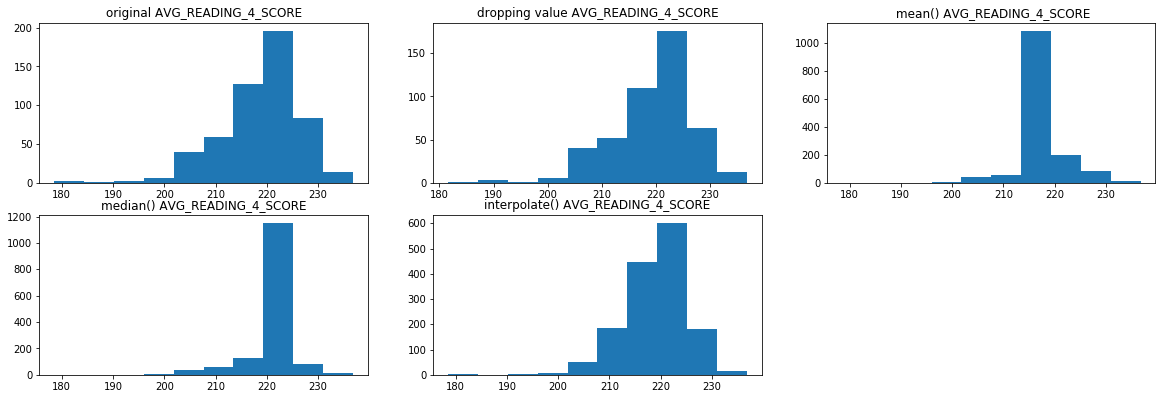

In [57]:
plt.figure(figsize = (20,10))

plt.subplot(3, 3, 1)
plt.hist(df["AVG_READING_4_SCORE"])
plt.title("original AVG_READING_4_SCORE")

plt.subplot(3, 3, 2)
plt.hist(df_education["AVG_READING_4_SCORE"])
plt.title("dropping value AVG_READING_4_SCORE")

plt.subplot(3, 3, 3)
plt.hist(df_education2["AVG_READING_4_SCORE"])
plt.title(" mean() AVG_READING_4_SCORE")

plt.subplot(3, 3, 4)
plt.hist(df_education3["AVG_READING_4_SCORE"])
plt.title("median() AVG_READING_4_SCORE")

plt.subplot(3, 3, 5)
plt.hist(df_education4["AVG_READING_4_SCORE"])
plt.title("interpolate() AVG_READING_4_SCORE")

plt.show()